## Sales Analysis by Year and Month Based on the Northwind Database (Data Merged from Multiple Tables)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Importing files to JupiterNotebook
order_details = pd.read_csv("order_details.csv")
orders = pd.read_csv("orders.csv")

In [16]:
orders.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [90]:
orders_data_required = orders [["order_date","order_id"]]

In [104]:
df = pd.merge(order_details,orders_data_required, on='order_id', how='inner')

In [105]:
print(df.head())

   order_id  product_id  unit_price  quantity  discount  order_date
0     10248          11        14.0        12       0.0  1996-07-04
1     10248          42         9.8        10       0.0  1996-07-04
2     10248          72        34.8         5       0.0  1996-07-04
3     10249          14        18.6         9       0.0  1996-07-05
4     10249          51        42.4        40       0.0  1996-07-05


In [15]:
order_details.head()

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [128]:
#Group Sales as per Year and Calcalating Total Orders
sales_by_year = df.groupby(['year']).agg(
    total_sales=('sales','sum'),
    total_orders=('order_id','nunique')
).reset_index()
print(sales_by_year)

   year  total_sales  total_orders
0  1996    226298.50           152
1  1997    658388.75           408
2  1998    469771.34           270


In [127]:
#Calculating Sales
df['sales'] = df['quantity'] * df['unit_price']

/var/folders/v0/33sslsb12pj66r9jd7w9cg9h0000gn/T/ipykernel_64851/1225018520.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_summary = df.groupby(['year', 'month_num', 'month_name']).agg(


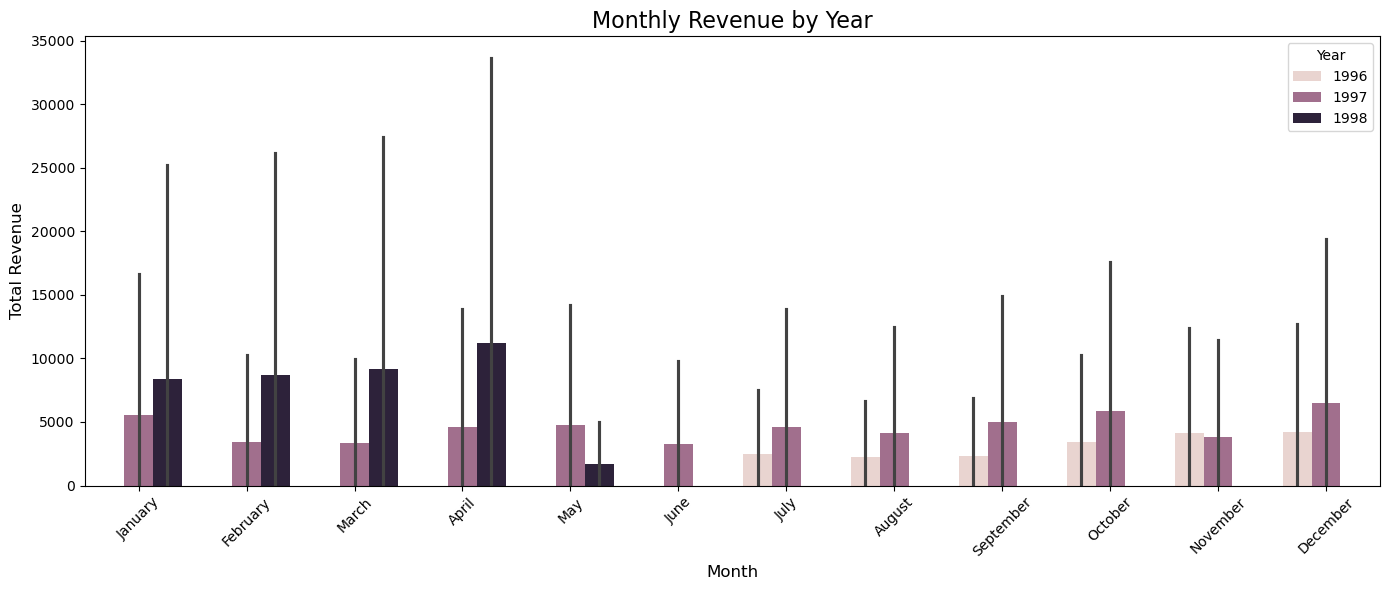

In [134]:

# Adding year and month
df['year'] = df['order_date'].dt.year
df['month_num'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%B')

# Set correct month orders
months_order = ['January','February','March','April','May','June',
                'July','August','September','October','November','December']
df['month_name'] = pd.Categorical(df['month_name'], categories=months_order, ordered=True)

sales_summary = df.groupby(['year', 'month_num', 'month_name']).agg(
    total_sales=('sales','sum'),
    total_orders=('order_id','nunique')
).reset_index()

# --- building barplot ---
plt.figure(figsize=(14,6))
sns.barplot(
    data=sales_summary,
    x='month_name',
    y='total_sales',
    hue='year'
)

plt.title("Monthly Revenue by Year", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()